In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv('clustering_data.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban


In [13]:
x=data.drop(['Unnamed: 0','Loan_ID'],axis=1)

In [17]:
x.shape

(614, 11)

In [18]:
x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [20]:
x.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [24]:
x.dropna(inplace=True)

In [25]:
x.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [26]:
x.shape

(499, 11)

In [29]:
x.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,499,2,Male,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,499,2,Yes,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,499,4,0,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,499,2,Graduate,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,499,2,No,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,499.0,NaN,NaN,NaN,5336.128257,5618.157076,150.0,2885.5,3859.0,5825.0,81000.0
CoapplicantIncome,499.0,NaN,NaN,NaN,1566.995832,2580.954598,0.0,0.0,1086.0,2251.5,33837.0
LoanAmount,499.0,NaN,NaN,NaN,139.224449,83.684395,0.0,98.0,125.0,166.5,600.0
Loan_Amount_Term,499.0,NaN,NaN,NaN,342.012024,64.860368,36.0,360.0,360.0,360.0,480.0
Credit_History,499.0,NaN,NaN,NaN,0.851703,0.35575,0.0,1.0,1.0,1.0,1.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [34]:
col=x.select_dtypes(include='object').columns

In [37]:
label=LabelEncoder()
for i in col:
    x[i]=label.fit_transform(x[i])

In [41]:
num=data.select_dtypes(exclude='object').columns

In [53]:
from sklearn.preprocessing import scale
from scipy.stats import zscore

In [59]:
x[num]=x[num].apply(zscore)

In [61]:
from sklearn.cluster import KMeans

E:\Anacondafiles\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


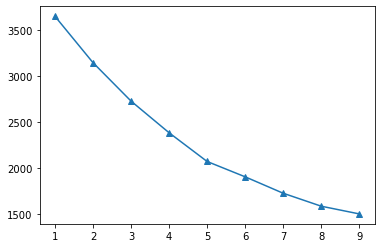

In [63]:
mcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    mcss.append(kmeans.inertia_)
plt.plot(range(1,10),mcss,marker="^")

In [64]:
from scipy.spatial.distance import cdist

In [72]:
distance=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    distance.append(sum(np.min(cdist(x,kmeans.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

E:\Anacondafiles\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


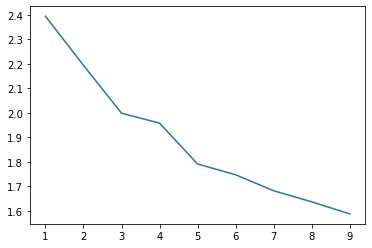

In [73]:
plt.plot(range(1,10),distance)

In [74]:
kmean=KMeans(n_clusters=3)
kmeans.fit(x)
c=x.copy()
c["Groups"]=kmeans.predict(x)

In [81]:
kmean=KMeans(n_clusters=5)
kmeans.fit(x)
d=x.copy()
d["Groups"]=kmeans.predict(x)

In [83]:
d['Groups'].value_counts()

6    125
0    112
1     88
3     61
5     48
4     36
2     21
7      5
8      3
Name: Groups, dtype: int64

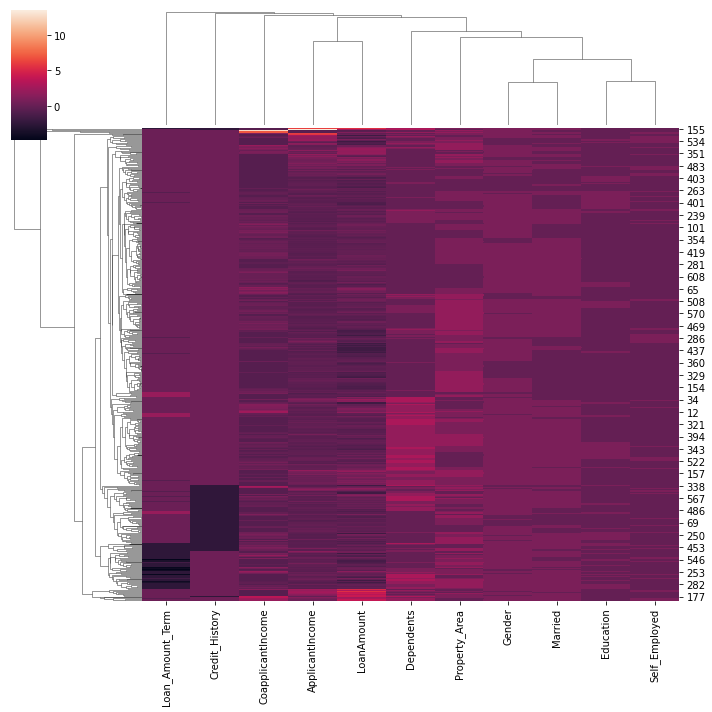

In [84]:
sns.clustermap(x)

In [85]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'